# Fake Audio

In [6]:
import numpy as np
from scipy.io import wavfile

# Replace with your filename
sample_rate, data = wavfile.read('file10005.mp3.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav')
print(f"Sample rate: {sample_rate} Hz")
print(f"Data shape: {data.shape}")

Sample rate: 16000 Hz
Data shape: (32000,)


In [7]:
# If stereo, take the mean of the two channels
if data.ndim == 2:
    data = data.mean(axis=1)

In [8]:
# Number of samples
N = data.shape[0]

# Perform FFT
fft_vals = np.fft.fft(data)

# Only need the positive frequencies (first half of FFT result)
fft_vals = fft_vals[:N // 2]

# Compute corresponding frequencies
freqs = np.fft.fftfreq(N, d=1.0/sample_rate)
freqs = freqs[:N // 2]

# Magnitude spectrum (absolute value)
magnitude = np.abs(fft_vals)


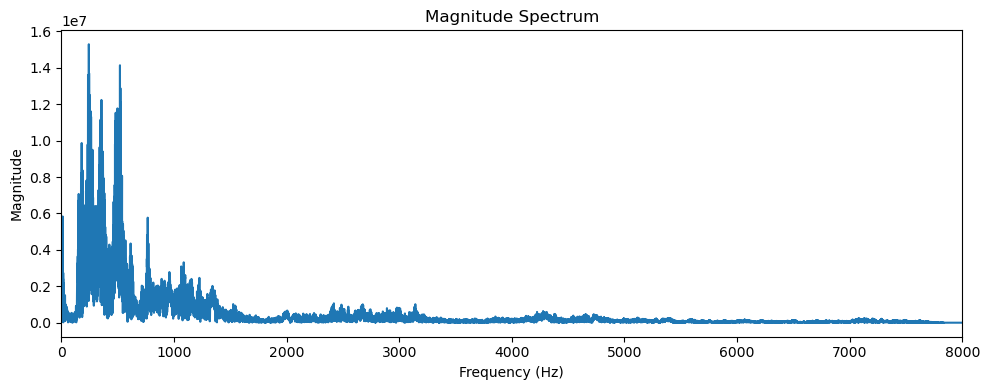

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(freqs, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')
plt.xlim(0, sample_rate/2)   # show only positive freqs
plt.tight_layout()
plt.show()


# Real Audio

In [21]:
# Replace with your filename
sample_rate, data = wavfile.read('file1000.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav')
print(f"Sample rate: {sample_rate} Hz")
print(f"Data shape: {data.shape}")

Sample rate: 16000 Hz
Data shape: (32000,)


In [22]:
# If stereo, take the mean of the two channels
if data.ndim == 2:
    data = data.mean(axis=1)

In [25]:
# Number of samples
N = data.shape[0]

# Perform FFT
fft_vals = np.fft.fft(data)

# Only need the positive frequencies (first half of FFT result)
fft_vals = fft_vals[:N // 2]

# Compute corresponding frequencies
freqs = np.fft.fftfreq(N, d=1.0/sample_rate)
freqs = freqs[:N // 2]

# Magnitude spectrum (absolute value)
magnitude = np.abs(fft_vals)


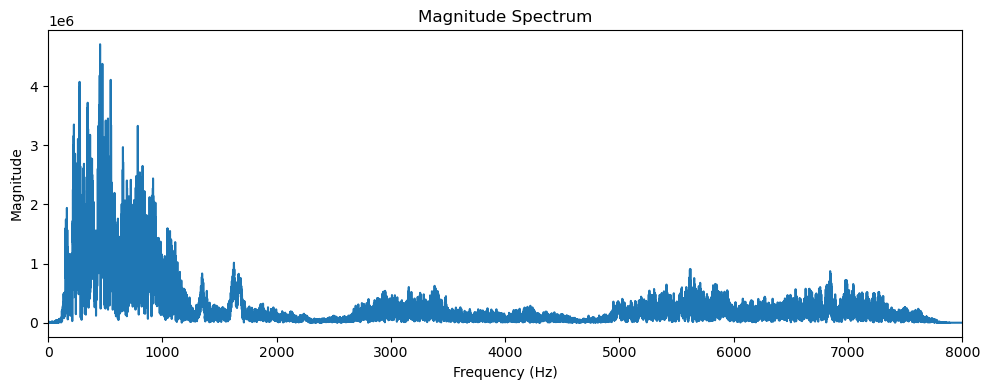

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(freqs, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')
plt.xlim(0, sample_rate/2)   # show only positive freqs
plt.tight_layout()
plt.show()

# Save the FFT of audio 

In [27]:
import numpy as np
from scipy.io import wavfile
import csv

# 1. Load WAV
sample_rate, data = wavfile.read('file1000.wav_16k.wav_norm.wav_mono.wav_silence.wav_2sec.wav')

# 2. Convert to mono if needed
if data.ndim == 2:
    data = data.mean(axis=1)

# 3. Compute FFT
N = len(data)
fft_vals = np.fft.fft(data)[: N // 2]
freqs   = np.fft.fftfreq(N, d=1.0/sample_rate)[: N // 2]
magnitude = np.abs(fft_vals)

# 4. Write to CSV
with open('fft_output.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    # header
    writer.writerow(['frequency_hz', 'magnitude'])
    # rows
    writer.writerows(zip(freqs, magnitude))

print("Wrote FFT data to fft_output.csv")


Wrote FFT data to fft_output.csv
